In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import gym
import random

In [2]:
# create agent class
class Agent():

  def __init__(self, lr, gamma, eps_min, eps_max, n_states, n_actions, eps_dec):
    # instantiate variables
    self.lr = lr    # alpha (learning rate)
    self.gamma = gamma    # gamma (discount factor)
    self.epsilon = eps_max  # starting epsilon value
    self.eps_dec = eps_dec  # decay factor
    self.eps_min = eps_min  # ending epsilon value
    self.eps_max = eps_max  # starting epsilon value
    self.n_states = n_states  # number of environment states
    self.n_actions = n_actions  # number of environment actions

    self.Q_table = {}   # Q table
    self.init_Q()   # initialize Q table w/zeros

  def init_Q(self):
    '''

    Initialize the Q table with all zeros.

    '''
    # loop over states and actions
    for i in range(self.n_states):
      for j in range(self.n_actions):
        self.Q_table[(i, j)] = 0.0 # Q table(State, Action) = 0

  def update_Q(self, reward, current_state, next_state, action):
    '''

    Update Q table for a specific state-action pair using
    the Q table update rule.

    '''
    max_action = self.find_max_A(next_state)      # find the max action for the resultant state

    # update with the Q table rule
    # Q(s_t, a_t) = Q(s_t, a_t) + alpha * (reward_t+1 + gamma * Q(s_t+1, a_max) - Q(s_t, a_t))
    self.Q_table[(current_state, action)] += + self.lr*(reward + self.gamma * 
                                                self.Q_table[(next_state, max_action)] - self.Q_table[(current_state, action)])

  def find_max_A(self, state):
    
    # find the max action by finding the maximum of Q-values of each action associated with the state
    max_action = np.argmax(np.array([self.Q_table[(state, a)] for a in range(self.n_actions)]))
    return max_action

In [3]:
env = gym.make('FrozenLake-v0') # create the environment

In [4]:
'''
Q-LEARNING PSEUDOCODE

Initialize  for all state and aciton pairs. 

Initialize alpha, gamma, epsilon max and end.

Repeat for each episode:
  
  Initalize the state s.

  Repeat for each time step within an episode:

    Choose A based on the epsilon greedy strategy.

    Perform action, get state s' and reward r.

    Update Q using the Q-learning update rule.

    Set the old state = new state.
'''

"\nQ-LEARNING PSEUDOCODE\n\nInitialize  for all state and aciton pairs. \n\nInitialize alpha, gamma, epsilon max and end.\n\nRepeat for each episode:\n  \n  Initalize the state s.\n\n  Repeat for each time step within an episode:\n\n    Choose A based on the epsilon greedy strategy.\n\n    Perform action, get state s' and reward r.\n\n    Update Q using the Q-learning update rule.\n\n    Set the old state = new state.\n"

In [7]:
# initialize agent with appropriate hyperparameters
agent = Agent(lr = 0.001, gamma = 0.9, eps_dec = 0.9999995, eps_max=1.0, eps_min=0.01, n_states = env.observation_space.n, n_actions=env.action_space.n)

# create win and scores array to keep track of scores, win percentage
win = []
scores = []

# loop over num_episodes
for _ in range(500000):

  # initialize observation, done flag, score accumulator
  obs = env.reset()
  done = False
  score = 0

  # while the game isn't finished
  while not done:

    # select an action w/epsilon-greedy strategy
    # get a random number
    rand_num = np.random.random()

    # if the random number is less than epsilon, take a random action
    # else, find the max action for the state using the Q-table
    if rand_num < agent.epsilon:
      action = env.action_space.sample()
    else:
      action = agent.find_max_A(obs)

    # take action within the environment
    new_obs, reward, done, info = env.step(action)
    # update the Q table based on the results of the action
    agent.update_Q(reward, obs, new_obs, action)
    # accumulate reward in the score
    score += reward

    # decay epsilon of the agent as long as it is greater than the minimum value
    # if it isn't greater than the minimum value, then just set it equal to the minimum value
    if agent.epsilon > agent.eps_min:
      agent.epsilon = agent.epsilon * agent.eps_dec
    else:
      agent.epsilon = agent.eps_min

    # set the old observation equal to the new observation
    obs = new_obs

  # append score to the scores array
  scores.append(score)
  # calculate the win percentage every 100 games
  if _ % 100 == 0:
    # calculate, add to the win percentage list
    win_pct = np.mean(scores[-100:])
    win.append(win_pct)

    # every 1000 games, print basic information to prove that the model is working
    if _ % 1000 == 0:
      
      print('episode ', _, 'win_pct %.2f' % win_pct, 'epsilon %.2f' % agent.epsilon)

# close environment once finished
env.close()

episode  0 win_pct 0.00 epsilon 1.00
episode  1000 win_pct 0.00 epsilon 1.00
episode  2000 win_pct 0.01 epsilon 0.99
episode  3000 win_pct 0.02 epsilon 0.99
episode  4000 win_pct 0.02 epsilon 0.98
episode  5000 win_pct 0.02 epsilon 0.98
episode  6000 win_pct 0.02 epsilon 0.98
episode  7000 win_pct 0.03 epsilon 0.97
episode  8000 win_pct 0.01 epsilon 0.97
episode  9000 win_pct 0.02 epsilon 0.97
episode  10000 win_pct 0.01 epsilon 0.96
episode  11000 win_pct 0.00 epsilon 0.96
episode  12000 win_pct 0.01 epsilon 0.95
episode  13000 win_pct 0.05 epsilon 0.95
episode  14000 win_pct 0.00 epsilon 0.95
episode  15000 win_pct 0.03 epsilon 0.94
episode  16000 win_pct 0.01 epsilon 0.94
episode  17000 win_pct 0.00 epsilon 0.94
episode  18000 win_pct 0.02 epsilon 0.93
episode  19000 win_pct 0.02 epsilon 0.93
episode  20000 win_pct 0.01 epsilon 0.93
episode  21000 win_pct 0.04 epsilon 0.92
episode  22000 win_pct 0.02 epsilon 0.92
episode  23000 win_pct 0.06 epsilon 0.91
episode  24000 win_pct 0.03 e

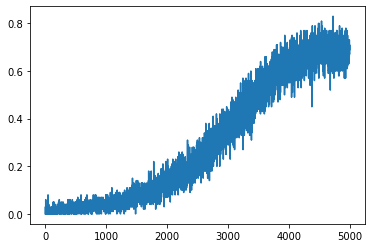

In [8]:
# plot the win percentage
plt.plot(win)
plt.show()